In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv -O hw-1.csv

--2022-09-21 02:40:27--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘hw-1.csv’

hw-1.csv            100%[===================>]   1.36M  --.-KB/s    in 0.009s  

2022-09-21 02:40:27 (145 MB/s) - ‘hw-1.csv’ saved [1423529/1423529]



In [3]:
usecols = [
    'latitude', 'longitude',
    'housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity']

In [4]:
data = pd.read_csv('/content/hw-1.csv', usecols=usecols)

In [5]:
print(data.shape)

(20640, 10)


In [6]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
data=data.fillna(0)

In [9]:
data['rooms_per_household'] = data['total_rooms']/data['households']

In [10]:
data['bedrooms_per_room'] = data['total_bedrooms']/data['total_rooms']
data['population_per_household'] = data['population']/data['households']

In [11]:
data['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
data_class = data.copy()

In [14]:
mean = data_class['median_house_value'].mean()

data_class['above_average'] = np.where(data_class['median_house_value']>=mean,1,0)

In [15]:
data_class = data_class.drop('median_house_value', axis=1)

In [16]:
df_train_full, df_test = train_test_split(data_class, test_size=0.2, random_state=42)

In [17]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [20]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011,1
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082,1
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059,0
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016,1
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456,1


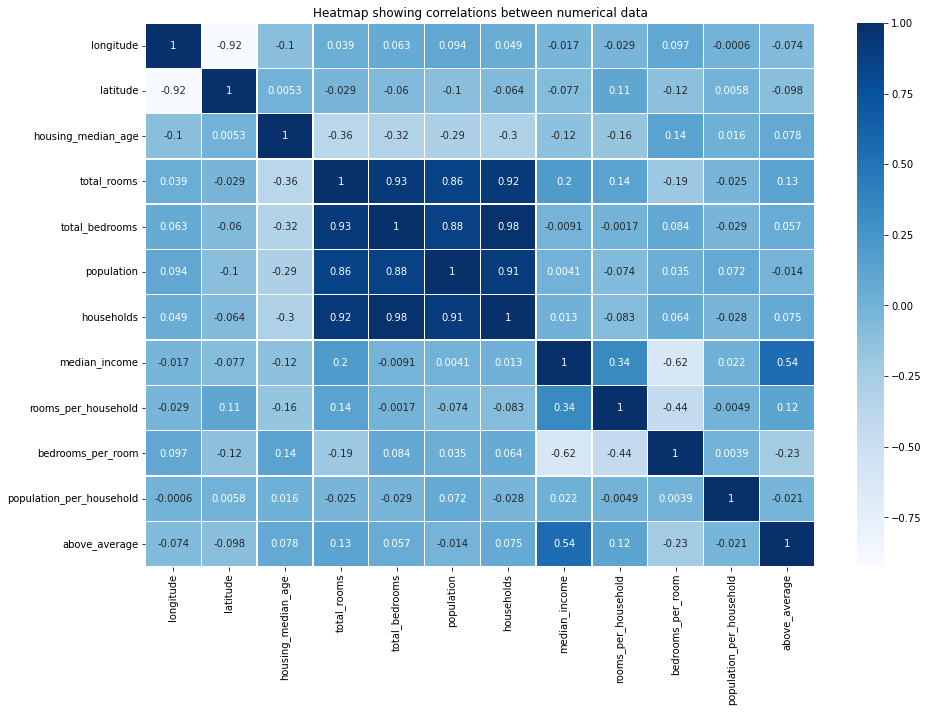

In [21]:
plt.figure(figsize=(15,10))  
sns.heatmap(df_train_full.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [22]:
df_train_full.corr().unstack().sort_values(ascending = False)

longitude                 longitude                   1.000000
latitude                  latitude                    1.000000
population_per_household  population_per_household    1.000000
bedrooms_per_room         bedrooms_per_room           1.000000
rooms_per_household       rooms_per_household         1.000000
                                                        ...   
                          bedrooms_per_room          -0.435169
bedrooms_per_room         median_income              -0.616669
median_income             bedrooms_per_room          -0.616669
longitude                 latitude                   -0.924485
latitude                  longitude                  -0.924485
Length: 144, dtype: float64

In [23]:
df_train_full['total_bedrooms'].corr(df_train_full['households'])

0.9802545152967725

In [24]:
df_train_full['total_bedrooms'].corr(df_train_full['total_rooms'])

0.9304892875010858

In [25]:
df_train_full['population'].corr(df_train_full['households'])

0.9074517390524003

In [26]:
df_train_full['population_per_household'].corr(df_train_full['total_rooms'])

-0.024990731291362967

In [27]:
from sklearn.metrics import mutual_info_score

In [28]:
cat = ['ocean_proximity']

In [29]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

In [30]:
df_mi

,MI
ocean_proximity,0.101384


In [31]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
num = [
    'latitude', 'longitude',
    'housing_median_age','total_rooms','total_bedrooms','population','households','median_income']

In [33]:
train_dict = df_train[cat + num].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [34]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.84


In [35]:
features = cat + num
features

['ocean_proximity',
 'latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [36]:
orig_score = accuracy


for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

ocean_proximity 0.021928294573643425 0.8180717054263565
latitude 0.005939922480620141 0.8340600775193798
longitude 0.005939922480620141 0.8340600775193798
housing_median_age 0.010058139534883659 0.8299418604651163
total_rooms 0.0027906976744185297 0.8372093023255814
total_bedrooms 0.0027906976744185297 0.8372093023255814
population 0.01974806201550383 0.8202519379844961
households 0.007877906976744176 0.8321220930232558
median_income 0.05608527131782948 0.7839147286821705


In [37]:
data['median_house_value']=np.log1p(data['median_house_value'])
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [38]:
train_dict = df_train[cat + num].to_dict(orient='records')

In [39]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [40]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [41]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag",random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 20))

0 0.524666571952129
0.01 0.5246665719679866
0.1 0.5246665721186231
1 0.524666573632914
10 0.5246665887520305
